In [1]:
import os

In [2]:
os.chdir('..')

In [3]:
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\tabular-playground-series-oct-2022.zip
.\data\comb_final_submission.csv
.\data\final_submission.csv
.\data\sample_submission.csv
.\data\submission.csv
.\data\test.csv
.\data\test.feather
.\data\test_dtypes.csv
.\data\train_0.csv
.\data\train_0.feather
.\data\train_1.csv
.\data\train_1.feather
.\data\train_2.csv
.\data\train_2.feather
.\data\train_3.csv
.\data\train_3.feather
.\data\train_4.csv
.\data\train_4.feather
.\data\train_5.csv
.\data\train_5.feather
.\data\train_6.csv
.\data\train_6.feather
.\data\train_7.csv
.\data\train_7.feather
.\data\train_8.csv
.\data\train_8.feather
.\data\train_9.csv
.\data\train_9.feather
.\data\train_dtypes.csv
.\notebooks\Data - 80% Data - 0.19784.ipynb
.\notebooks\Data - All Data - 0.19747.ipynb
.\notebooks\Data - One Fold - 0.20257.ipynb
.\notebooks\Data - One Fold - Pruebas 2.ipynb
.\notebooks\Data - One Fold - Xgboost.ipynb
.\notebooks\Data to feather.ipynb
.\notebooks\.ipynb_checkpoints\Data - 80% Data - 0.19784-checkpoint.ipynb
.\notebooks\.i

In [4]:
import pandas as pd
import numpy as np

In [5]:
data_folder = "data/"
results_folder = "results/"
models_folder = "models/"

In [6]:
def reduce_mem_usage(df, verbose=True):
    start_mem = df.memory_usage().sum()/1024**2
    numerics = ['int8', 'int16', 'int32', 'int64',
                'float16', 'float32', 'float64']

    for col in df.columns:
        if col == 'team_scoring_next':
            df[col] = df[col].astype('category')
            continue
        col_type = df[col].dtypes
        limit = abs(df[col]).max()

        for tp in numerics:
            cond1 = str(col_type)[0] == tp[0]
            if tp[0] == 'i': cond2 = limit <= np.iinfo(tp).max
            else: cond2 = limit <= np.finfo(tp).max

            if cond1 and cond2:
                df[col] = df[col].astype(tp)
                break

    end_mem = df.memory_usage().sum()/1024**2

    reduction = (start_mem - end_mem)*100/start_mem
    if verbose:
        print(f'[INFO] Mem. usage decreased to {end_mem:.2f}'
              f' MB {reduction:.2f}% reduction.')
    return df

In [9]:
def feather_read_reduce(path):
    data = pd.read_feather(path)
    reduce_mem_usage(data)
    return data

In [10]:
data = feather_read_reduce(f'{data_folder}train_0.feather')
data.head()

[INFO] Mem. usage decreased to 245.98 MB 44.19% reduction.


,game_num,event_id,event_time,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,...,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,player_scoring_next,team_scoring_next,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,1,1002,-33.31250,-0.0,0.0,1.854492,-0.0,0.0,0.0,41.81250,...,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0
1,1,1002,-33.21875,-0.0,0.0,1.854492,-0.0,0.0,0.0,42.25000,...,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0
2,1,1002,-33.09375,-0.0,0.0,1.854492,-0.0,0.0,0.0,43.21875,...,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0
3,1,1002,-33.00000,-0.0,0.0,1.854492,-0.0,0.0,0.0,43.90625,...,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0
4,1,1002,-32.87500,-0.0,0.0,1.854492,-0.0,0.0,0.0,44.96875,...,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0


In [11]:
data.columns

Index(['game_num', 'event_id', 'event_time', 'ball_pos_x', 'ball_pos_y',
       'ball_pos_z', 'ball_vel_x', 'ball_vel_y', 'ball_vel_z', 'p0_pos_x',
       'p0_pos_y', 'p0_pos_z', 'p0_vel_x', 'p0_vel_y', 'p0_vel_z', 'p0_boost',
       'p1_pos_x', 'p1_pos_y', 'p1_pos_z', 'p1_vel_x', 'p1_vel_y', 'p1_vel_z',
       'p1_boost', 'p2_pos_x', 'p2_pos_y', 'p2_pos_z', 'p2_vel_x', 'p2_vel_y',
       'p2_vel_z', 'p2_boost', 'p3_pos_x', 'p3_pos_y', 'p3_pos_z', 'p3_vel_x',
       'p3_vel_y', 'p3_vel_z', 'p3_boost', 'p4_pos_x', 'p4_pos_y', 'p4_pos_z',
       'p4_vel_x', 'p4_vel_y', 'p4_vel_z', 'p4_boost', 'p5_pos_x', 'p5_pos_y',
       'p5_pos_z', 'p5_vel_x', 'p5_vel_y', 'p5_vel_z', 'p5_boost',
       'boost0_timer', 'boost1_timer', 'boost2_timer', 'boost3_timer',
       'boost4_timer', 'boost5_timer', 'player_scoring_next',
       'team_scoring_next', 'team_A_scoring_within_10sec',
       'team_B_scoring_within_10sec'],
      dtype='object')

# Distance from the ball

In [12]:
(np.array([1,2,3])-np.array([3,2,1]))**2

array([4, 0, 4], dtype=int32)

In [13]:
data = data.assign(p0_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p0_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p0_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p0_pos_z"])
            )**(1/2),
            
            p1_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p1_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p1_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p1_pos_z"])
            )**(1/2),
            
            p2_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p2_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p2_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p2_pos_z"])
            )**(1/2),
            
            p3_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p3_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p3_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p3_pos_z"])
            )**(1/2),
            
            p4_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p4_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p4_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p4_pos_z"])
            )**(1/2),
            
            p5_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p5_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p5_pos_y"]) +                
                np.square(df_['ball_pos_z']-df_[f"p5_pos_z"])
            )**(1/2)
            
)

# Data Analysis

In [14]:
data.columns

Index(['game_num', 'event_id', 'event_time', 'ball_pos_x', 'ball_pos_y',
       'ball_pos_z', 'ball_vel_x', 'ball_vel_y', 'ball_vel_z', 'p0_pos_x',
       'p0_pos_y', 'p0_pos_z', 'p0_vel_x', 'p0_vel_y', 'p0_vel_z', 'p0_boost',
       'p1_pos_x', 'p1_pos_y', 'p1_pos_z', 'p1_vel_x', 'p1_vel_y', 'p1_vel_z',
       'p1_boost', 'p2_pos_x', 'p2_pos_y', 'p2_pos_z', 'p2_vel_x', 'p2_vel_y',
       'p2_vel_z', 'p2_boost', 'p3_pos_x', 'p3_pos_y', 'p3_pos_z', 'p3_vel_x',
       'p3_vel_y', 'p3_vel_z', 'p3_boost', 'p4_pos_x', 'p4_pos_y', 'p4_pos_z',
       'p4_vel_x', 'p4_vel_y', 'p4_vel_z', 'p4_boost', 'p5_pos_x', 'p5_pos_y',
       'p5_pos_z', 'p5_vel_x', 'p5_vel_y', 'p5_vel_z', 'p5_boost',
       'boost0_timer', 'boost1_timer', 'boost2_timer', 'boost3_timer',
       'boost4_timer', 'boost5_timer', 'player_scoring_next',
       'team_scoring_next', 'team_A_scoring_within_10sec',
       'team_B_scoring_within_10sec', 'p0_dist_ball', 'p1_dist_ball',
       'p2_dist_ball', 'p3_dist_ball', 'p4_dist_b

In [15]:
data[data.team_A_scoring_within_10sec != 0]

,game_num,event_id,event_time,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,...,player_scoring_next,team_scoring_next,team_A_scoring_within_10sec,team_B_scoring_within_10sec,p0_dist_ball,p1_dist_ball,p2_dist_ball,p3_dist_ball,p4_dist_ball,p5_dist_ball
2111,2,2001,-9.945312,0.798828,11.226562,26.062500,0.981445,46.375000,29.593750,59.500000,...,0,A,1,0,113.3750,35.59375,51.68750,48.593750,48.468750,92.875000
2112,2,2001,-9.843750,0.921875,17.015625,29.656250,0.975586,46.187500,27.859375,56.406250,...,0,A,1,0,119.6875,42.90625,54.46875,47.968750,58.031250,90.687500
2113,2,2001,-9.742188,1.019531,21.625000,32.375000,0.970703,46.031250,26.484375,53.718750,...,0,A,1,0,124.3750,48.65625,56.03125,47.687500,66.437500,89.562500
2114,2,2001,-9.640625,1.099609,25.453125,34.500000,0.966797,45.937500,25.328125,50.562500,...,0,A,1,0,127.7500,53.59375,57.71875,47.906250,74.000000,88.562500
2115,2,2001,-9.546875,1.203125,30.421875,37.187500,0.961426,45.781250,23.843750,48.156250,...,0,A,1,0,132.2500,59.62500,60.31250,47.593750,85.875000,85.562500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147370,737,737002,-0.481689,8.601562,88.562500,11.226562,25.171875,44.656250,-24.093750,-29.703125,...,2,A,1,0,75.3125,73.81250,22.12500,28.734375,11.851562,21.953125
2147371,737,737002,-0.379395,11.320312,93.375000,8.539062,25.093750,44.500000,-25.421875,-24.750000,...,2,A,1,0,77.4375,79.93750,26.31250,29.812500,7.398438,15.773438
2147372,737,737002,-0.266602,14.031250,98.187500,5.710938,25.015625,44.343750,-26.750000,-21.078125,...,2,A,1,0,80.1250,86.06250,29.96875,32.687500,5.707031,12.468750
2147373,737,737002,-0.149902,15.632812,102.375000,2.914062,-32.000000,9.828125,-17.296875,-14.242188,...,2,A,1,0,78.8125,91.75000,33.12500,34.812500,7.199219,9.609375


# Model A

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit 
import lightgbm as lgb

In [17]:
splitter = GroupShuffleSplit(test_size=.2, n_splits=1, random_state = 42)
split = splitter.split(data, groups=data['game_num'])
train_inds, test_inds = next(split)

In [18]:
train = data.iloc[train_inds]
test = data.iloc[test_inds]

In [19]:
train_A = train.drop(columns=['game_num','event_id','event_time','player_scoring_next','team_scoring_next','team_B_scoring_within_10sec'])
test_A = test.drop(columns=['game_num','event_id','event_time','player_scoring_next','team_scoring_next','team_B_scoring_within_10sec'])

In [20]:
X_train_A = train_A.drop('team_A_scoring_within_10sec',axis=1)
y_train_A = train_A.team_A_scoring_within_10sec

X_test_A = test_A.drop('team_A_scoring_within_10sec',axis=1)
y_test_A = test_A.team_A_scoring_within_10sec

In [21]:
# X_train, X_test, y_train, y_test = train_test_split(data_A.drop('team_A_scoring_within_10sec',axis=1),data_A.team_A_scoring_within_10sec, test_size=0.2, random_state=42)

In [22]:
lgb_train_A = lgb.Dataset(X_train_A,y_train_A)
lgb_eval_A  = lgb.Dataset(X_test_A,y_test_A)

In [39]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric' : 'binary_logloss',
    'n_estimators':3000,
#     'num_leaves': 31,
    'learning_rate': 0.025,
     'feature_fraction': 0.7,
     'bagging_fraction': 0.7,
     'bagging_freq': 5,
#     cross-entropy
    'verbose': -1,
    'device': 'gpu',
    'max_depth' : 10,
#     'min_data_in_leaf' : 
}

In [40]:
gbm_a = lgb.train(params,
                lgb_train_A,
                valid_sets=[lgb_train_A,lgb_eval_A],
                verbose_eval=100,
                early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds
[100]	training's binary_logloss: 0.195435	valid_1's binary_logloss: 0.211948
[200]	training's binary_logloss: 0.188544	valid_1's binary_logloss: 0.210113
[300]	training's binary_logloss: 0.183374	valid_1's binary_logloss: 0.20926
[400]	training's binary_logloss: 0.178919	valid_1's binary_logloss: 0.208732
[500]	training's binary_logloss: 0.17497	valid_1's binary_logloss: 0.208507
[600]	training's binary_logloss: 0.171248	valid_1's binary_logloss: 0.208417
[700]	training's binary_logloss: 0.16793	valid_1's binary_logloss: 0.208426
[800]	training's binary_logloss: 0.16479	valid_1's binary_logloss: 0.208325
[900]	training's binary_logloss: 0.161853	valid_1's binary_logloss: 0.208368
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.164479	valid_1's binary_logloss: 0.208323


In [117]:
# [782]	training's binary_logloss: 0.163415	valid_1's binary_logloss: 0.208039 bag freq 5 y 0.7 10 depth

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

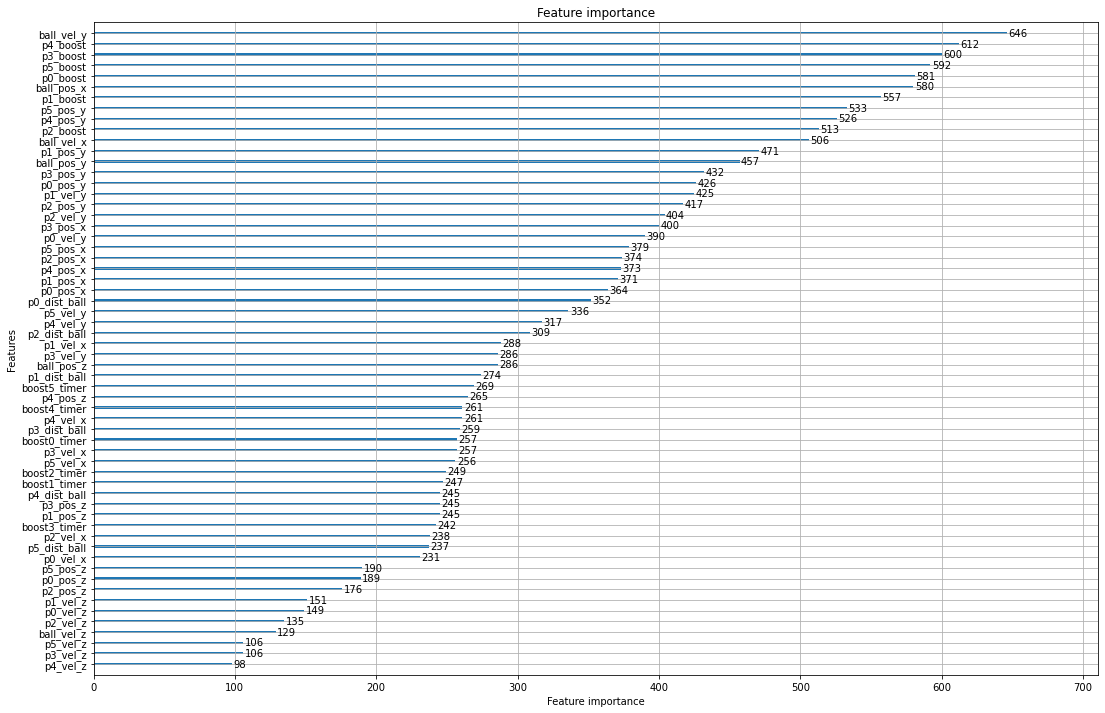

In [77]:
lgb.plot_importance(gbm_a,figsize=(18,12))

In [43]:
import shap

In [45]:
%time shap_values = shap.TreeExplainer(gbm_a).shap_values(X_test_A)

Wall time: 6min 20s


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [ ]:
shap_values = explainer.shap_values(X_train_A)

  2%|                   | 36461/1715063 [11:34<532:30]       

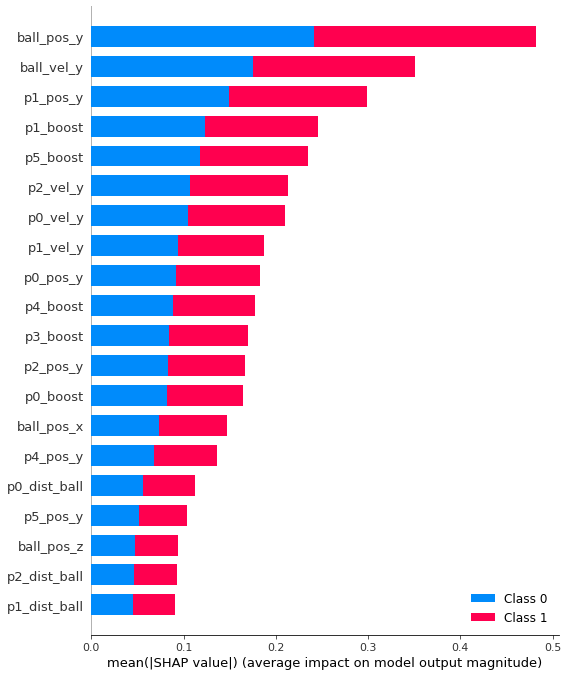

In [47]:
shap.summary_plot(shap_values, X_test_A)

In [ ]:
explainer = shap.TreeExplainer(gbm_a, data=X_train_A)

In [ ]:
shap_values = explainer.shap_values(X_train_A)

In [ ]:
shap.summary_plot(shap_values=shap_values,
                  features=X_train,
                  feature_names=X_train.columns
                 )

# Model B

In [69]:
train_B = train.drop(columns=['game_num','event_id','event_time','player_scoring_next','team_scoring_next','team_A_scoring_within_10sec'])
test_B = test.drop(columns=['game_num','event_id','event_time','player_scoring_next','team_scoring_next','team_A_scoring_within_10sec'])

In [71]:
X_train_B = train_B.drop('team_B_scoring_within_10sec',axis=1)
y_train_B = train_B.team_B_scoring_within_10sec

X_test_B = test_B.drop('team_B_scoring_within_10sec',axis=1)
y_test_B = test_B.team_B_scoring_within_10sec

In [120]:
X_train, X_test, y_train, y_test = train_test_split(data_B.drop('team_B_scoring_within_10sec',axis=1),data_B.team_B_scoring_within_10sec, test_size=0.2, random_state=42)

In [72]:
lgb_train_B = lgb.Dataset(X_train_B,y_train_B)
lgb_eval_B  = lgb.Dataset(X_test_B,y_test_B)

In [73]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric' : 'binary_logloss',
    'n_estimators':1000,
#     'num_leaves': 31,
    'learning_rate': 0.03,
     'feature_fraction': 0.8,
     'bagging_fraction': 0.8,
     'bagging_freq': 5,
#     cross-entropy
    'verbose': -1,
    'device': 'gpu'
}

In [74]:
gbm_b = lgb.train(params,
                lgb_train_B,
                valid_sets=[lgb_train_B,lgb_eval_B],
                verbose_eval=100,
                early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds
[100]	training's binary_logloss: 0.191528	valid_1's binary_logloss: 0.188945
[200]	training's binary_logloss: 0.183491	valid_1's binary_logloss: 0.187527
[300]	training's binary_logloss: 0.177149	valid_1's binary_logloss: 0.186974
[400]	training's binary_logloss: 0.171751	valid_1's binary_logloss: 0.186769
[500]	training's binary_logloss: 0.166964	valid_1's binary_logloss: 0.186618
[600]	training's binary_logloss: 0.162527	valid_1's binary_logloss: 0.186621
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.164615	valid_1's binary_logloss: 0.186589


In [75]:
# [10000]	training's binary_logloss: 0.00450018	valid_1's binary_logloss: 0.0152842

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

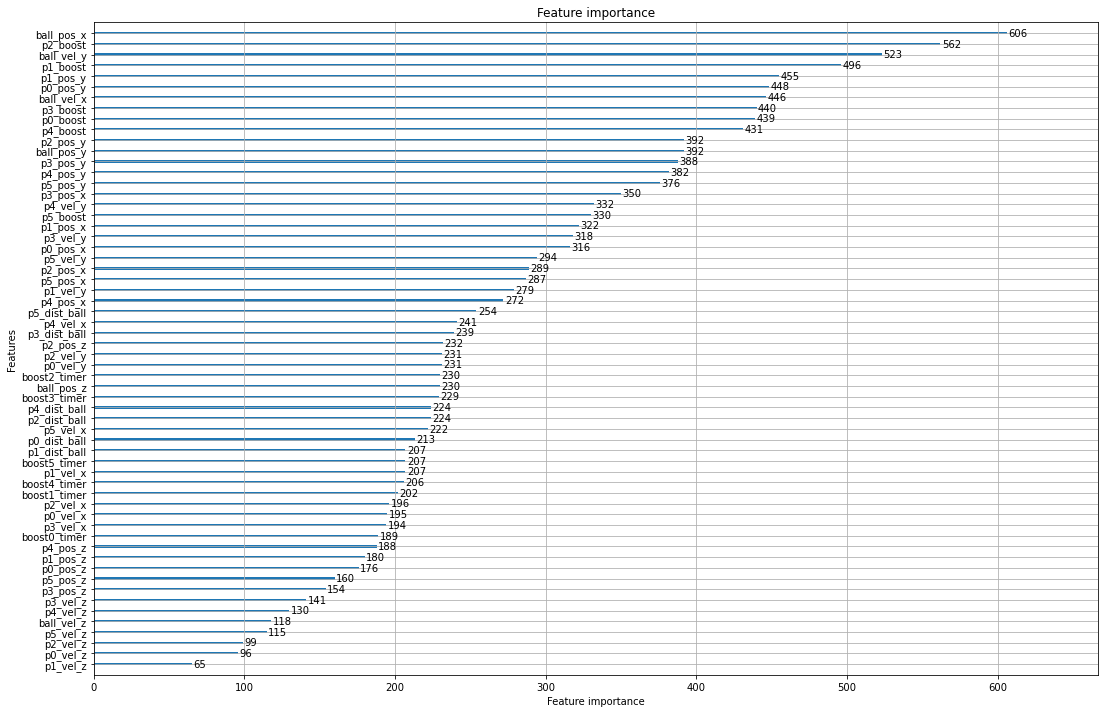

In [76]:
lgb.plot_importance(gbm_b,figsize=(18,12))

# Submission

In [80]:
test_sub = feather_read_reduce(f'{data_folder}test.feather').drop('id',axis=1)

[INFO] Mem. usage decreased to 74.89 MB 44.00% reduction.


In [83]:
test_sub = test_sub.assign(p0_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p0_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p0_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p0_pos_z"])
            )**(1/2),
            
            p1_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p1_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p1_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p1_pos_z"])
            )**(1/2),
            
            p2_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p2_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p2_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p2_pos_z"])
            )**(1/2),
            
            p3_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p3_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p3_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p3_pos_z"])
            )**(1/2),
            
            p4_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p4_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p4_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p4_pos_z"])
            )**(1/2),
            
            p5_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p5_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p5_pos_y"]) +                
                np.square(df_['ball_pos_z']-df_[f"p5_pos_z"])
            )**(1/2)
            
)

In [84]:
predA = gbm_a.predict(test_sub)
predB = gbm_b.predict(test_sub)

In [85]:
sub = pd.read_csv(f"{data_folder}sample_submission.csv")

sub["team_A_scoring_within_10sec"] = predA
sub["team_B_scoring_within_10sec"] = predB

sub.to_csv(f"{data_folder}final_submission.csv",index=False)